In [2]:
from random import random

In [3]:
# PARTIE I : on ne laisse passer qu'un seul candidat
# générer n variables aléatoires (= n secrétaires) correspondant à leurs qualités
def qualities(n) : 
    return [random() for _ in range(n)] 
# donner le pourcentage de chance de tomber sur la meilleure secrétaire
def recrut(n):
    success = 0
    nb_simul = 10000 
    for _ in range(nb_simul) :
        sec = qualities(n)
        best = sec.index(max(sec))
        k = 1 
        maxi = sec[0]
        while k < n :
            if sec[k] > maxi :
                break
            else :
                k += 1
        if k == best :
            success += 1
    return success / nb_simul

In [4]:
recrut(12) # 25%

0.2515

In [5]:
# PARTIE II : on laisse passer 2 candidats
# générer n variables aléatoires (= n secrétaires) correspondant à leurs qualités
def qualities(n) : 
    return [random() for _ in range(n)] 
# donner le pourcentage de chance de tomber sur la meilleure secrétaire
def recrut(n):
    success = 0
    nb_simul = 10000 
    for _ in range(nb_simul) :
        sec = qualities(n)
        best = sec.index(max(sec))
        k = 2
        maxi = max(sec[0], sec[1])
        while k < n :
            if sec[k] > maxi :
                break
            else :
                k += 1
        if k == best :
            success += 1
    return success / nb_simul

In [6]:
recrut(12) # 34%

0.3391

In [7]:
# PARTIE III : on laisse passer k (=suppr) candidats
# générer n variables aléatoires (= n secrétaires) correspondant à leurs qualités
def qualities(n) : 
    return [random() for _ in range(n)] 
# donner le pourcentage de chance de tomber sur la meilleure secrétaire
def recrut(n, suppr):
    success = 0
    nb_simul = 10000 
    for _ in range(nb_simul) :
        sec = qualities(n)
        best = sec.index(max(sec))
        k = suppr
        maxi = max(sec[:suppr])
        while k < n :
            if sec[k] > maxi :
                break
            else :
                k += 1
        if k == best :
            success += 1
    return success / nb_simul



In [8]:
for k in range(1, 12) :
    print("{} : success = {}"\
          .format(k,recrut(12,k)))
    
# meilleure stratégie : ne pas recruter les 4 premiers candidats
# on arrive à pratiquement 40% de chance d'avoir la meilleure secrétaire

1 : success = 0.2491
2 : success = 0.3316
3 : success = 0.3841
4 : success = 0.3968
5 : success = 0.3946
6 : success = 0.3745
7 : success = 0.3327
8 : success = 0.2805
9 : success = 0.2196
10 : success = 0.1527
11 : success = 0.0898


In [9]:
def laisser(n) :
    pourc, r = 0, 0
    for i in range(1,n) : 
        p = recrut(n,i) # pourcentage de succés si on a laissé i candidats
        if p > pourc : # si ce pourcentage au pourcentage précédent
            pourc = p # alors la stratégie est meilleure
            r = i # il faut laisser i candidats
    return r

In [10]:
import pandas as pd
df = pd.DataFrame(columns = ["nombre de candidats", "nombres de candidats à laisser"])
df["nombre de candidats"] = [i for i in range(2,60,2)]
df["nombre de candidats à laisser"] = [laisser(i) for i in range(2,60,2)]

Text(0.5, 1.0, 'Représentation graphique des simulations')

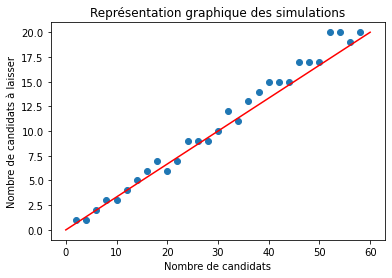

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df["nombre de candidats"], df["nombre de candidats à laisser"])
plt.plot([0,60], [0,20], color="red", linestyle="solid")
plt.xlabel("Nombre de candidats")
plt.ylabel("Nombre de candidats à laisser")
plt.title("Représentation graphique des simulations")

In [15]:
# calcul théorique
# proba de succès si k candidats laissés
def recrut(n, k) :
    return k/n * sum([1/(j-1) for j in range(k+1, n+1)])
# proba de succès pour k allant de 1 à 11
for k in range(1, 12) : 
    print("{} : success = {}".format(k, recrut(12,k)))

# on retrouve le même résultat entre calcul théorique et simulation : 4

1 : success = 0.2516564454064454
2 : success = 0.33664622414622414
3 : success = 0.3799693362193362
4 : success = 0.3955146705146705
5 : success = 0.3902266714766715
6 : success = 0.3682720057720058
7 : success = 0.3324284511784512
8 : success = 0.2846801346801347
9 : success = 0.2265151515151515
10 : success = 0.15909090909090912
11 : success = 0.08333333333333333


In [16]:
import pandas as pd
n = 100
df = pd.DataFrame(columns = ["nombre de candidats laissés", "probabilité de succès"])
df["nombre de candidats laissés"] = [k for k in range(1,n)]
df["probabilité de succès"] = df["nombre de candidats laissés"].apply(lambda x: recrut(n,x))

In [17]:
df

,nombre de candidats laissés,probabilité de succès
0,1,0.051774
1,2,0.083548
2,3,0.110321
3,4,0.133762
4,5,0.154702
...,...,...
94,95,0.048979
95,96,0.039390
96,97,0.029696
97,98,0.019899


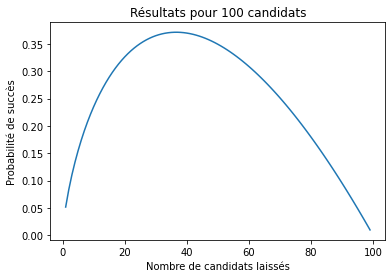

In [18]:
plt.plot(df["nombre de candidats laissés"], df["probabilité de succès"])
plt.title("Résultats pour 100 candidats")
plt.xlabel("Nombre de candidats laissés")
plt.ylabel("Probabilité de succès")
plt.show()